In [1]:
import glob
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from utils import events_to_numpy
% matplotlib inline

In [2]:
# CHANGE ME
start, end = 31, 39  # experiment numbers (see google sheet)

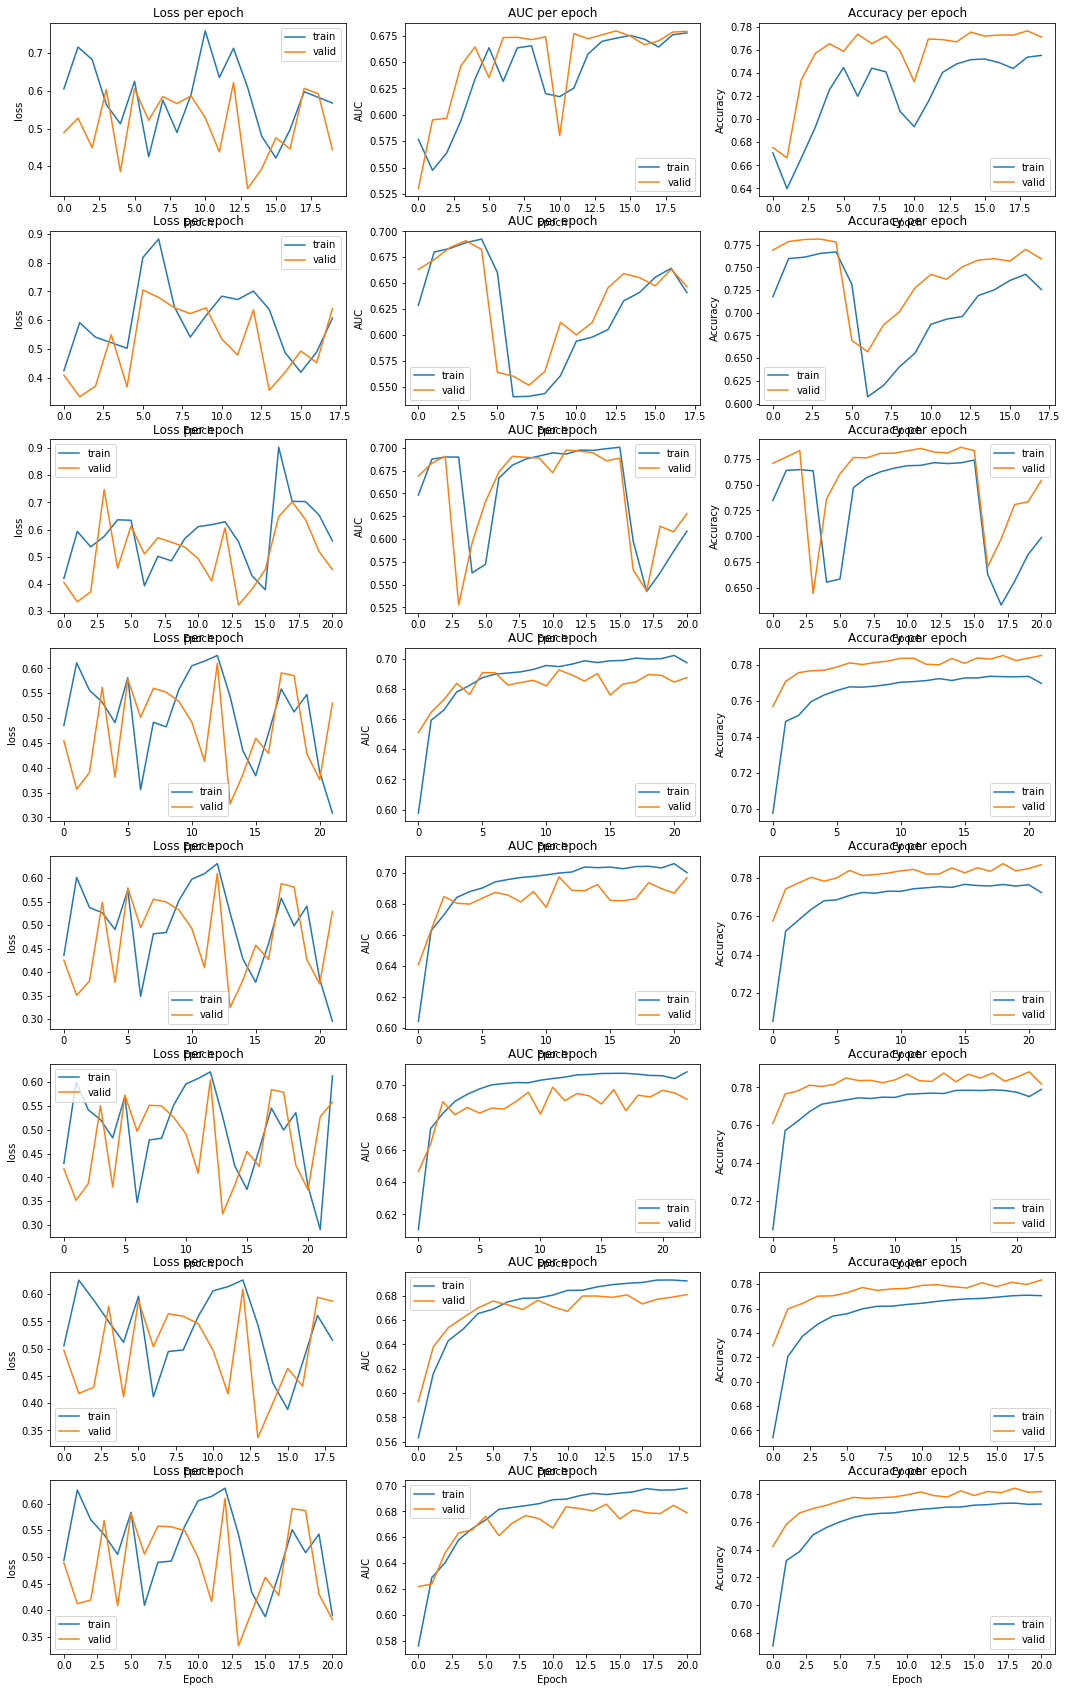

In [3]:
experiment_nums = np.arange(start, end)
fig, all_axs = plt.subplots(len(experiment_nums), 3, figsize=(18, 30))   

for i in experiment_nums:
    event_dir = '/afs/inf.ed.ac.uk/user/s17/s1771906/MLP/mlp-group-project/' + \
                'experiments/experiment' + str(i) + 'a' + "/20*/"
    event_train_path = event_dir + "train/events*"
    event_val_path = event_dir + "valid/events*"
    
    for filename in glob.glob(event_train_path):
        metrics_train = events_to_numpy(filename)
    for filename in glob.glob(event_val_path):
        metrics_valid = events_to_numpy(filename)

        # plot metrics
        axs = all_axs[i-start]
        metrics_train = metrics_train[:len(metrics_valid)]
        e = np.arange(len(metrics_valid))

        axs = axs.ravel()
        train_plt, = axs[0].plot(e, metrics_train[:, 0])
        valid_plt, = axs[0].plot(e, metrics_valid[:, 0])
        axs[0].legend([train_plt, valid_plt], ['train', 'valid'])
        axs[0].set_xlabel('Epoch')
        axs[0].set_ylabel('loss')
        axs[0].set_title('Loss per epoch')

        train_plt, = axs[1].plot(e, metrics_train[:, 1])
        valid_plt, = axs[1].plot(e, metrics_valid[:, 1])
        axs[1].legend([train_plt, valid_plt], ['train', 'valid'])
        axs[1].set_xlabel('Epoch')
        axs[1].set_ylabel('AUC')
        axs[1].set_title('AUC per epoch')

        train_plt, = axs[2].plot(e, metrics_train[:, 2])
        valid_plt, = axs[2].plot(e, metrics_valid[:, 2])
        axs[2].legend([train_plt, valid_plt], ['train', 'valid'])
        axs[2].set_xlabel('Epoch')
        axs[2].set_ylabel('Accuracy')
        axs[2].set_title('Accuracy per epoch')